<a href="https://colab.research.google.com/github/Frostbite22/learning-DL-by-doing-1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
from google.colab import drive
  
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/PyTorch/learning_DL/")

Mounted at /content/drive


In [4]:
import zipfile 

with zipfile.ZipFile('archive.zip','r') as zip_ref:
  zip_ref.extractall()

In [5]:
path = os.getcwd()
path

'/content/drive/MyDrive/PyTorch/learning_DL'

In [6]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('sign_mnist_train.csv')


In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
for index,row in train_df.iterrows():
  pixels = np.array(row[1:])
  print(pixels.reshape(28,28).shape)
  print(pixels)
  break

(28, 28)
[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
 170 171 171 171 172 171 171 170 170 169 111 121 129 135 141 144 148 151
 154 157 160 163 164 170 119 152 171 171 170 171 172 172 172 172 172 171
 171 170 113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142
 170 171 171 171 172 172 173 173 172 171 171 171 116 125 133 139 143 146
 151 153 156 159 162 163 167 167  95 144 171 172 172 172 172 172 173 173
 173 172 172 171 117 126 134 140 145 149 153 156 158 161 163 164 175 156
  87 154 172 173 173 173 173 173 174 174 174 173 172 172 119 128 136 142
 146 150 153 156 159 163 165 164 184 148  89 164 172 174 174 174 174 175
 175 174 175 174 173 173 122 130 138 143 147 150 154 158 162 165 166 172
 181 128  94 170 173 175 174 175 176 177 177 177 177 175 175 174 122 132
 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178 178 179
 179 179 179 178 179 177 175 174 125 134 141 147 150 153 157 161 164 167
 168 184 179 116 126 165 176 179 180 180 1

In [9]:
from PIL import Image
from pathlib import Path 

#Setup path to a data folder 
data_path = Path(path)
image_path = data_path / "images"

#If the image folder doesn't exist, download it and prepare it 
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else: 
  print(f"{image_path} does not exist, creating one")
  image_path.mkdir(parents=True,exist_ok=True)


counter = dict()
train_dataset = []


for index,row in train_df.iterrows(): 
    pixels = np.array(row[1:],dtype=np.uint8)
    pixels = np.reshape(pixels,(28,28))
    image = Image.fromarray(pixels)
    label = row[0]
    pixels_tensor = torch.from_numpy(pixels).unsqueeze(0)
    train_dataset.append((pixels_tensor,label))

    if label not in counter:
        counter[label] = 0
    counter[label] += 1

    filename = 'img{}_{}.png'.format(label, counter[label])
    image.save(image_path/filename)

    print('saved:', image_path/filename)


Streaming output truncated to the last 5000 lines.
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img19_981.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img2_927.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img17_1053.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img2_928.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img22_1006.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img14_984.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img5_977.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img7_810.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img1_834.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img6_893.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img16_1021.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img14_985.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/images/img24_930.png
saved: /content/drive/MyDrive

In [11]:
img = Image.open('/content/drive/MyDrive/PyTorch/learning_DL/images/img16_28.png')

In [12]:
img

In [36]:
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [13]:
image_as_array = np.asarray(img)
t = torch.from_numpy(image_as_array)
t = t.unsqueeze(0)
t.shape

torch.Size([1, 28, 28])

In [16]:
img, label = train_dataset[0]

In [18]:
img.shape

torch.Size([1, 28, 28])

In [19]:
label

3

In [24]:
from PIL import Image
from pathlib import Path 


def images_preprocessing(global_path,image_folder,dataframe):
  #Setup path to a data folder 
  data_path = Path(global_path)
  image_path = data_path / image_folder

  #If the image folder doesn't exist, download it and prepare it 
  if image_path.is_dir():
    print(f"{image_path} directory already exists")
  else: 
    print(f"{image_path} does not exist, creating one")
    image_path.mkdir(parents=True,exist_ok=True)


  counter = dict()
  dataset = []


  for index,row in dataframe.iterrows(): 
      pixels = np.array(row[1:],dtype=np.uint8)
      pixels = np.reshape(pixels,(28,28))
      image = Image.fromarray(pixels)
      label = row[0]
      pixels_tensor = torch.from_numpy(pixels).unsqueeze(0)
      dataset.append((pixels_tensor,label))

      if label not in counter:
          counter[label] = 0
      counter[label] += 1

      filename = 'img{}_{}.png'.format(label, counter[label])
      image.save(image_path/filename)

      print('saved:', image_path/filename)
  return dataset


In [25]:
test_df = pd.read_csv("sign_mnist_test.csv")
test_dataset = images_preprocessing(path,"test_Images",test_df)

Streaming output truncated to the last 5000 lines.
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img1_137.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img20_73.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img5_74.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img4_149.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img7_136.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img10_92.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img2_95.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img3_73.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img6_107.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img21_119.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img15_112.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/test_Images/img4_150.png
saved: /content/drive/MyDrive/PyTorch/learning_DL/

In [40]:
image_test, label_test = test_dataset[0]

In [41]:
image_test.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'G')

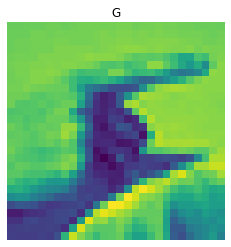

In [42]:
import matplotlib.pyplot as plt

plt.imshow(image_test.permute(1,2,0))
plt.axis(False)
plt.title(classes[label_test])
